# **LogisticRegression**

### **Project Plan & Methodology**

1. Business Objective
2. Data Understanding
3. Exploratory Data Analysis (EDA)
4. Data Preparation Strategy
5. Modeling Approach
6. Evaluation Framework
7. Generalization & Stability Checks
8. Limitations & Ethical Considerations
9. Future Improvements

#### **Lets Start Our Model**

### **Buisness Objective-** 
The objective of this project is to build an interpretable machine learning model that predicts the presence of heart disease in patients based on clinical and physiological attributes.
- Assist healthcare professionals in early risk assessment
- Provide probability-based predictions rather than hard decisions
- Maintain transparency and interpretability suitable for medical use cases

### **Library Imports**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# General settings
import warnings
warnings.filterwarnings("ignore")


### **Data Loading**

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


The Very First Thing that we will do is Mapping Down Target Feature

In [3]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Absence': 0,
    'Presence': 1
})

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### **Basic Data Overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
df.shape

(270, 14)

In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
print("Duplicate Count:-" , df.duplicated().sum())

Duplicate Count:- 0


**Basic Overview Concludes that**
1. Dataset have 270 Records and 14 Features
2. Data is Well organized with all records available
3. Data is clear without Duplicates
4. Data Types are Correct , We will just Need to Map our Target Feature into 0 and 1

### **Exploratory Data Analysis(EDA)**

- We are Dealing with Medical Dataset , Hence it is very Necessary to tackle Data Precisely , A single Mistake could Risk Someones Life
- We Must Fully Examine all the Input Features Carefully and Find Necessary Reletions between them
- Lets Begin Our EDA

**Univariate Analysis**

In [9]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

We will Plot Histplot For Numeric Features To check their Distribution

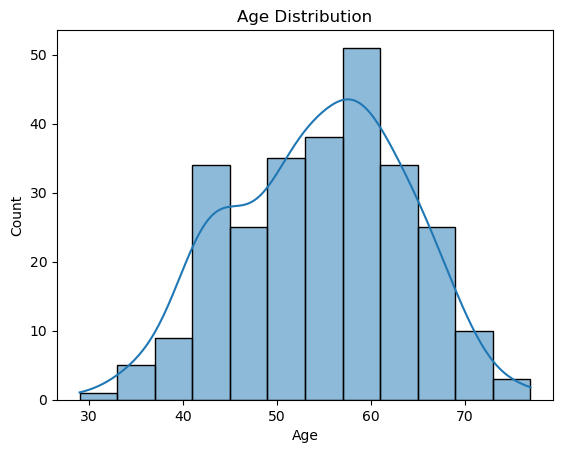

In [10]:
sns.histplot(df["Age"] , kde = True)
plt.title("Age Distribution")
plt.show()

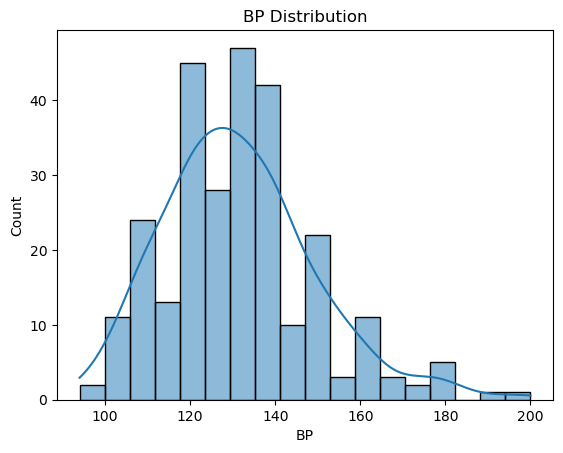

In [11]:
sns.histplot(df["BP"] , kde = True)
plt.title("BP Distribution")
plt.show()

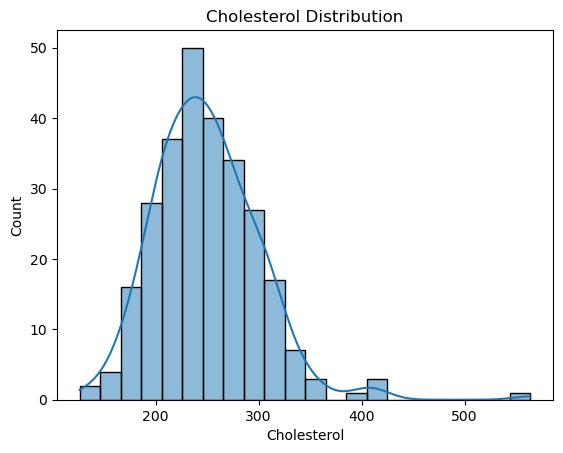

In [12]:
sns.histplot(df["Cholesterol"] , kde = True)
plt.title("Cholesterol Distribution")
plt.show()

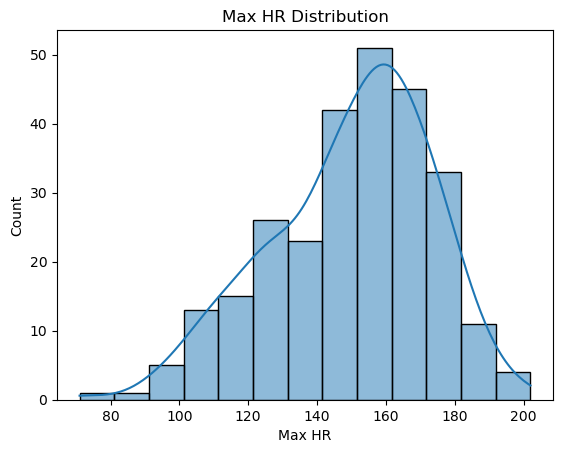

In [13]:
sns.histplot(df["Max HR"] , kde = True)
plt.title("Max HR Distribution")
plt.show()

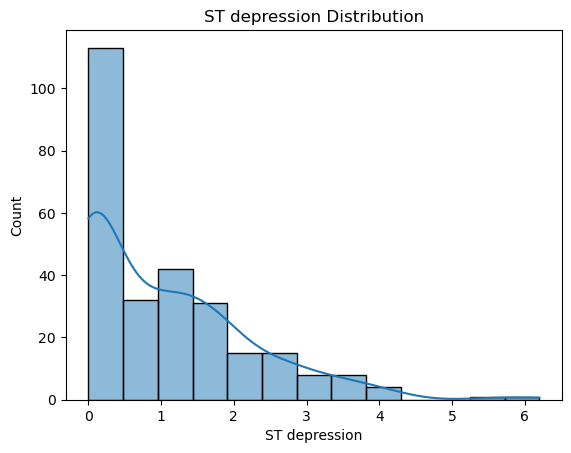

In [14]:
sns.histplot(df["ST depression"] , kde = True)
plt.title("ST depression Distribution")
plt.show()

We will Plot Countplot to Check Categorical Columns Count

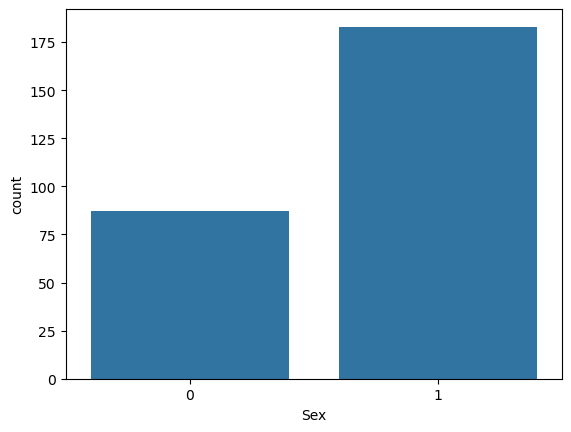

In [15]:
sns.countplot(x = df["Sex"])
plt.show()

In [16]:
df["Sex"].value_counts(normalize = True)*100

Sex
1    67.777778
0    32.222222
Name: proportion, dtype: float64

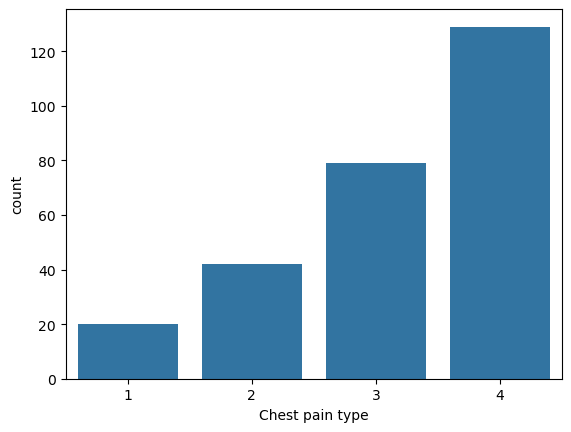

In [17]:
sns.countplot(x = df["Chest pain type"])
plt.show()

In [18]:
df["Chest pain type"].value_counts(normalize = True)*100

Chest pain type
4    47.777778
3    29.259259
2    15.555556
1     7.407407
Name: proportion, dtype: float64

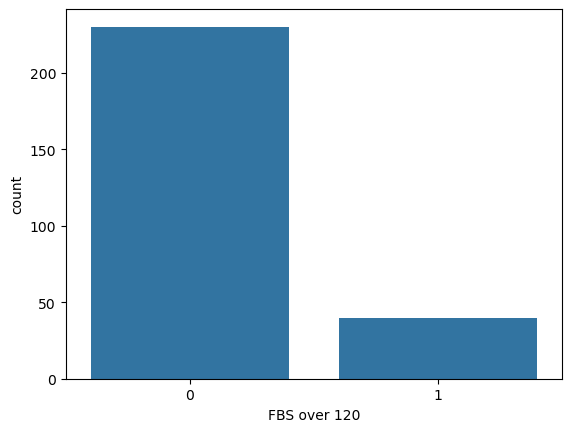

In [19]:
sns.countplot(x = df["FBS over 120"])
plt.show()

In [20]:
df["FBS over 120"].value_counts(normalize = True)*100

FBS over 120
0    85.185185
1    14.814815
Name: proportion, dtype: float64

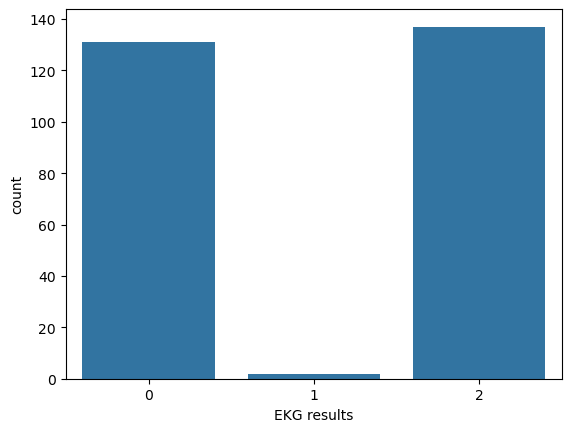

In [21]:
sns.countplot(x = df["EKG results"])
plt.show()

In [22]:
df["EKG results"].value_counts(normalize = True)*100

EKG results
2    50.740741
0    48.518519
1     0.740741
Name: proportion, dtype: float64

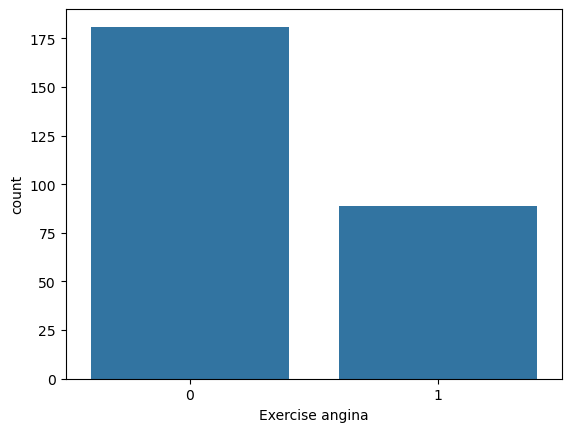

In [23]:
sns.countplot(x = df["Exercise angina"])
plt.show()

In [24]:
df["Exercise angina"].value_counts(normalize = True)*100

Exercise angina
0    67.037037
1    32.962963
Name: proportion, dtype: float64

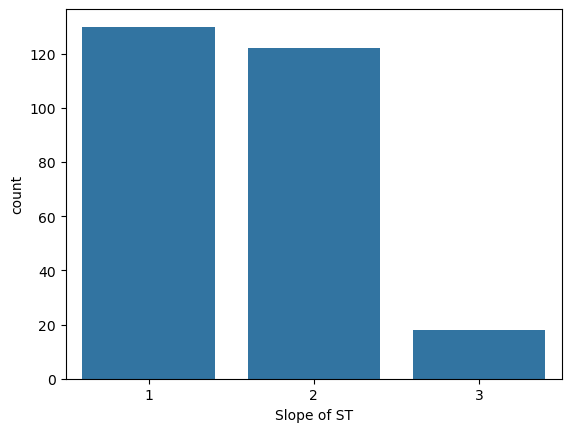

In [25]:
sns.countplot(x = df["Slope of ST"])
plt.show()

In [26]:
df["Slope of ST"].value_counts(normalize = True)*100

Slope of ST
1    48.148148
2    45.185185
3     6.666667
Name: proportion, dtype: float64

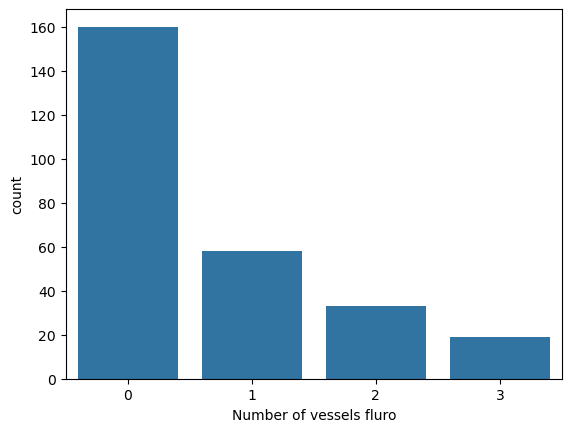

In [27]:
sns.countplot(x = df["Number of vessels fluro"])
plt.show()

In [28]:
df["Number of vessels fluro"].value_counts(normalize = True)*100

Number of vessels fluro
0    59.259259
1    21.481481
2    12.222222
3     7.037037
Name: proportion, dtype: float64

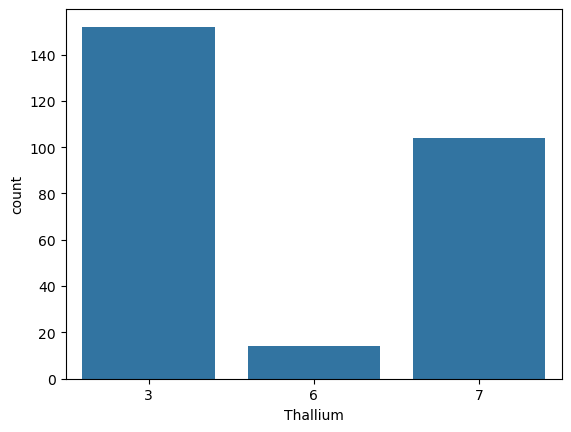

In [29]:
sns.countplot(x = df["Thallium"])
plt.show()

In [30]:
df["Thallium"].value_counts(normalize = True)*100

Thallium
3    56.296296
7    38.518519
6     5.185185
Name: proportion, dtype: float64

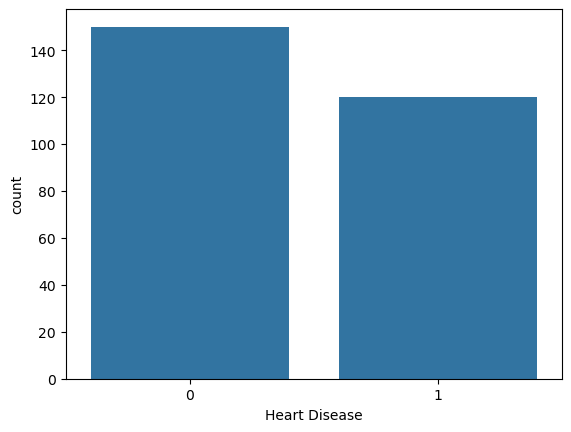

In [51]:
sns.countplot(x = df["Heart Disease"])
plt.show()

In [32]:
df["Heart Disease"].value_counts(normalize = True)*100

Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64

**Bivariate Analysis**

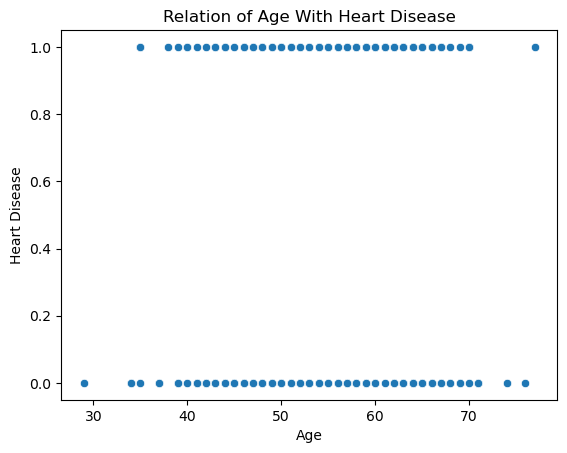

In [33]:
sns.scatterplot(x = df["Age"] , y = df["Heart Disease"])
plt.title("Relation of Age With Heart Disease")
plt.show()

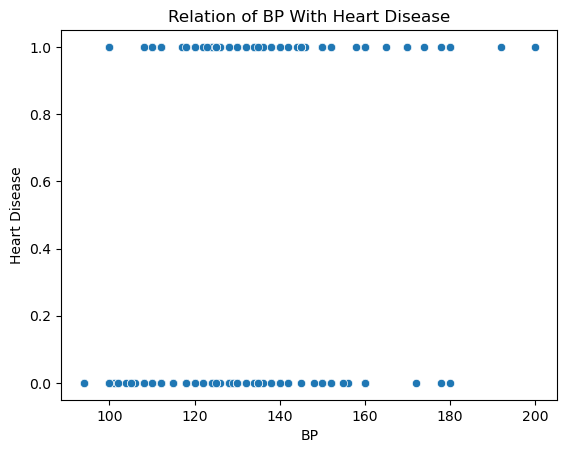

In [34]:
sns.scatterplot(x = df["BP"] , y = df["Heart Disease"])
plt.title("Relation of BP With Heart Disease")
plt.show()

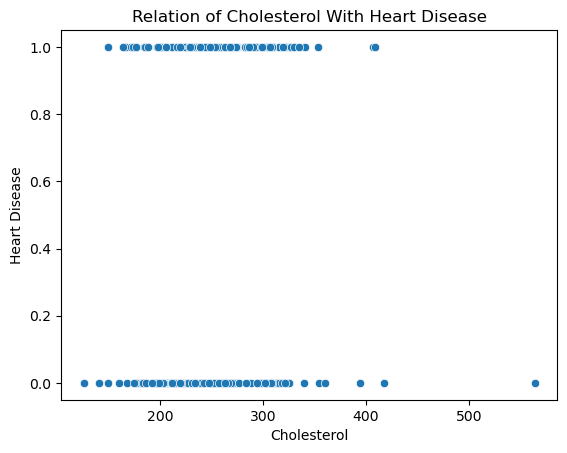

In [35]:
sns.scatterplot(x = df["Cholesterol"] , y = df["Heart Disease"])
plt.title("Relation of Cholesterol With Heart Disease")
plt.show()

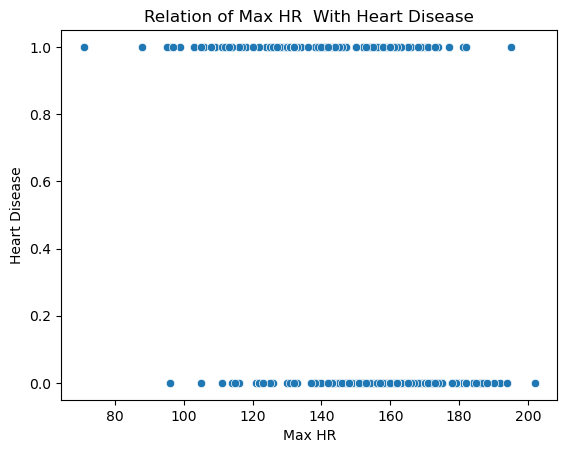

In [36]:
sns.scatterplot(x = df["Max HR"] , y = df["Heart Disease"])
plt.title("Relation of Max HR  With Heart Disease")
plt.show()

In [37]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [38]:
X = df.drop("Heart Disease" , axis = 1)
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [39]:
Y = df["Heart Disease"]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

In [40]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 42)

In [41]:
transformer = ColumnTransformer(transformers=[
    ("tnf1" , StandardScaler() , ["Age","BP" , "Cholesterol" , "Max HR"]),
    ("tnf2" , OneHotEncoder(sparse_output=False , drop = "first") , ["Sex" , "Chest pain type" , "FBS over 120" , "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro" , "Thallium"]),
] , remainder="passthrough")

In [42]:
x_train_mod = transformer.fit_transform(x_train)
x_test_mod = transformer.transform(x_test)

In [43]:
feature_names = transformer.get_feature_names_out()
print(feature_names)

['tnf1__Age' 'tnf1__BP' 'tnf1__Cholesterol' 'tnf1__Max HR' 'tnf2__Sex_1'
 'tnf2__Chest pain type_2' 'tnf2__Chest pain type_3'
 'tnf2__Chest pain type_4' 'tnf2__FBS over 120_1' 'tnf2__EKG results_1'
 'tnf2__EKG results_2' 'tnf2__Exercise angina_1' 'tnf2__Slope of ST_2'
 'tnf2__Slope of ST_3' 'tnf2__Number of vessels fluro_1'
 'tnf2__Number of vessels fluro_2' 'tnf2__Number of vessels fluro_3'
 'tnf2__Thallium_6' 'tnf2__Thallium_7' 'remainder__ST depression']


In [44]:
x_train_df = pd.DataFrame(x_train_mod, columns=feature_names)
x_test_df = pd.DataFrame(x_test_mod , columns = feature_names)

In [45]:
lo = LogisticRegression()
lo.fit(x_train_df , y_train)

LogisticRegression()

In [46]:
y_pred = lo.predict(x_test_df)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [47]:
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

comparison_df.head()


,Actual,Predicted
30,1,1
116,1,1
79,0,0
127,0,0
196,0,0


# **Model Evaluation**

### **Confusion Matrix**

In [48]:
Confusion_Matrix = confusion_matrix(y_test , y_pred)
Confusion_Matrix

array([[33,  0],
       [ 6, 15]], dtype=int64)

**Key Observations**
- Zero False Positives → No healthy patient was wrongly flagged as diseased
- 6 False Negatives → 6 patients with heart disease were missed
- Model correctly identified 15 out of 21 disease cases

But in Healthcare False_Neagtive is the Main Concern 

### **Classification Report**

In [49]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.71      0.83        21

    accuracy                           0.89        54
   macro avg       0.92      0.86      0.88        54
weighted avg       0.91      0.89      0.88        54



**Key Observation**
1. Class 0(No Disease)
   - Recall = 1.00 → All healthy patients were correctly identified
   - Precision = 0.85 → Some predicted healthy cases were actually sick
2. Class 1(Disease)
   - Precision = 1.00 → Every patient predicted as diseased actually had disease
   - Recall = 0.71 → Model missed ~29% of actual disease cases

It predicts "Disease" Only if it is very Confident

**Accuracy 89%-** Accuracy Looks Good But accuracy alone is not sufficient in Medical problrms

### **ROC - AUC Interpretation**

In [50]:
y_prob = lo.predict_proba(x_test_df)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.9336219336219336

The model achieves a ROC–AUC score of 0.93, indicating excellent discriminative ability between patients with and without heart disease.
This suggests that the model effectively ranks patients by risk and provides a strong foundation for threshold-based decision-making in a clinical setting.